In [1]:
import pandas as pd
import numpy as np

import librosa

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_clipped_onset_env(y, sr, hop_length):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length, aggregate=np.median)
    clipped_onset_env = np.clip(onset_env, 0, np.percentile(onset_env, 99.9))
    return clipped_onset_env

In [3]:
def get_onset_locs(y, sr, hop_length, val_ofset, windows_per_second, delta, seconds_to_wait, onset_env=None):
    onset_locs = librosa.onset.onset_detect(y, onset_envelope=onset_env, 
                                            sr=sr, hop_length=hop_length, 
                                            pre_max=val_ofset, post_max=val_ofset,
                                            delta=delta, wait=windows_per_second * seconds_to_wait)
    return onset_locs

In [4]:
def plot_onset_detect(onset_env, onset_locs, sr, hop_length, windows_per_second):
    plt.figure(figsize=(15, 4));

    plt.subplot(1, 2, 1);

    times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr, hop_length=hop_length)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: "{}:{}".format(int(t//60), int(t%60))))

    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[onset_locs], 0, onset_env.max(), color='r', alpha=0.8, label='Selected peaks')

    plt.legend(frameon=True, framealpha=0.8)

    plt.subplot(1, 2, 2);
    secs_to_next_onset = [(x2 - x1) / windows_per_second
                          for x1, x2 in zip(onset_locs[:-1], onset_locs[1:])]
    plt.plot(secs_to_next_onset);
    plt.ylabel('secs to next onset');
    plt.xlabel('onset index');

    plt.tight_layout();

In [5]:
sr = 22050
hop_length = 512

val_ofset = 1
windows_per_second = 43
delta = 0.2
seconds_to_wait = 3

In [6]:
df_f_name = '../data/taylor_df.pkl'
df = pd.read_pickle(df_f_name)
df.head(6)

,name,song_wave,scene_start_times_sec,onset_times_sec
0,Taylor Swift - White Horse-D1Xr-JFLxik,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.667 2 3.587 3...,"[0.6965986394557823, 1.3467573696145125, 1.648..."
1,Taylor Swift - The Story Of Us-nN6VR92V70M,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.500 2 1.417 3...,"[0.6501587301587302, 0.905578231292517, 1.0913..."
2,Taylor Swift - Delicate-tCXGJQYZ9JA,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 3.045 2 6.715 3 ...,"[3.8312925170068026, 4.040272108843538, 4.2028..."
3,Taylor Swift - Style--CmadmM5cOk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 7.424 2 9.259 3...,"[0.11609977324263039, 10.077460317460318, 10.4..."
4,Taylor Swift - ME! (feat. Brendon Urie of Pani...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.500 2 5.255 3 ...,"[17.29886621315193, 19.11002267573696, 19.6208..."
5,Taylor Swift - Mine-XPBwXKgDTdE,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.375 2 6.548 3...,"[0.5804988662131519, 0.8359183673469388, 1.091..."


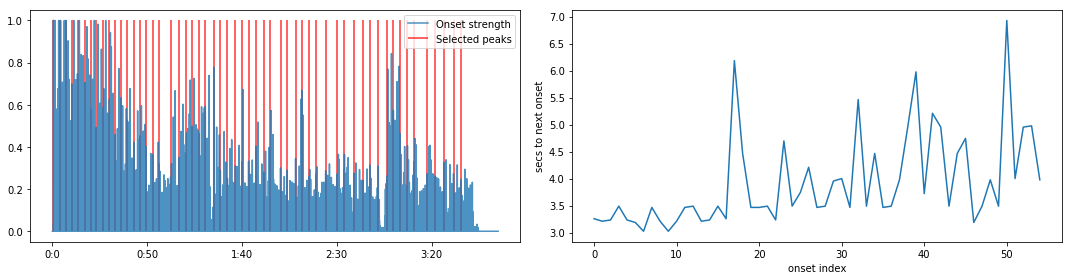

In [7]:
y = df['song_wave'].iloc[5]

onset_env = get_clipped_onset_env(y, sr, hop_length)
onset_locs = get_onset_locs(y, sr, hop_length, val_ofset, windows_per_second, delta, seconds_to_wait, onset_env)
plot_onset_detect(onset_env, onset_locs, sr, hop_length, windows_per_second)